In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pickle

In [ ]:
file = open("/content/thyroidDF (1).csv")
df = pd.read_csv(file)

In [ ]:
df

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,...,NaN,f,NaN,f,NaN,f,NaN,other,-,840801013
1,29,F,f,f,f,f,f,f,f,f,...,128.0,f,NaN,f,NaN,f,NaN,other,-,840801014
2,41,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,11.0,other,-,840801042
3,36,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.0,other,-,840803046
4,32,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,36.0,other,S,840803047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9167,56,M,f,f,f,f,f,f,f,f,...,64.0,t,0.83,t,77.0,f,NaN,SVI,-,870119022
9168,22,M,f,f,f,f,f,f,f,f,...,91.0,t,0.92,t,99.0,f,NaN,SVI,-,870119023
9169,69,M,f,f,f,f,f,f,f,f,...,113.0,t,1.27,t,89.0,f,NaN,SVI,I,870119025
9170,47,F,f,f,f,f,f,f,f,f,...,75.0,t,0.85,t,88.0,f,NaN,other,-,870119027


In [ ]:
feature_cols = ["age",
                "sex",
                "on_thyroxine",
                "query_on_thyroxine",
                "on_antithyroid_medication",
                "sick",
                "pregnant",
                "thyroid_surgery",
                "I131_treatment",
                "query_hypothyroid",
                "query_hyperthyroid",
                "lithium",
                "goitre",
                "tumor",
                "hypopituitary",
                "psych",
                "TSH measured",
                "TSH",
                "T3_measured",
                "T3",
                "TT4_measured",
                "TT4",
                "T4U_measured",
                "T4U",
                "FTI_measured",
                "FTI",
                "TBG_measured",
                "TBG",
               "target"]


In [ ]:
df

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,...,NaN,f,NaN,f,NaN,f,NaN,other,-,840801013
1,29,F,f,f,f,f,f,f,f,f,...,128.0,f,NaN,f,NaN,f,NaN,other,-,840801014
2,41,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,11.0,other,-,840801042
3,36,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.0,other,-,840803046
4,32,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,36.0,other,S,840803047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9167,56,M,f,f,f,f,f,f,f,f,...,64.0,t,0.83,t,77.0,f,NaN,SVI,-,870119022
9168,22,M,f,f,f,f,f,f,f,f,...,91.0,t,0.92,t,99.0,f,NaN,SVI,-,870119023
9169,69,M,f,f,f,f,f,f,f,f,...,113.0,t,1.27,t,89.0,f,NaN,SVI,I,870119025
9170,47,F,f,f,f,f,f,f,f,f,...,75.0,t,0.85,t,88.0,f,NaN,other,-,870119027


In [ ]:
target = df.target
create = target.str.split('([A-Za-z]+)', expand=True)
create = create[1]
target = create.replace({None:'Z'}) #here z is none type
df.target = target

In [ ]:
df.target.unique()

array(['Z', 'S', 'F', 'AK', 'R', 'I', 'M', 'N', 'G', 'K', 'A', 'KJ', 'L',
       'MK', 'Q', 'J', 'C', 'O', 'LJ', 'H', 'D', 'GK', 'MI', 'P', 'FK',
       'B', 'GI', 'GKJ', 'OI', 'E'], dtype=object)

In [ ]:
df

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,...,NaN,f,NaN,f,NaN,f,NaN,other,Z,840801013
1,29,F,f,f,f,f,f,f,f,f,...,128.0,f,NaN,f,NaN,f,NaN,other,Z,840801014
2,41,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,11.0,other,Z,840801042
3,36,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.0,other,Z,840803046
4,32,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,36.0,other,S,840803047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9167,56,M,f,f,f,f,f,f,f,f,...,64.0,t,0.83,t,77.0,f,NaN,SVI,Z,870119022
9168,22,M,f,f,f,f,f,f,f,f,...,91.0,t,0.92,t,99.0,f,NaN,SVI,Z,870119023
9169,69,M,f,f,f,f,f,f,f,f,...,113.0,t,1.27,t,89.0,f,NaN,SVI,I,870119025
9170,47,F,f,f,f,f,f,f,f,f,...,75.0,t,0.85,t,88.0,f,NaN,other,Z,870119027


In [ ]:
df = df.replace(['?'],np.nan)


In [ ]:
df.isnull().sum()

age                       0
sex                     307
on_thyroxine              0
query_on_thyroxine        0
on_antithyroid_meds       0
sick                      0
pregnant                  0
thyroid_surgery           0
I131_treatment            0
query_hypothyroid         0
query_hyperthyroid        0
lithium                   0
goitre                    0
tumor                     0
hypopituitary             0
psych                     0
TSH_measured              0
TSH                     842
T3_measured               0
T3                     2604
TT4_measured              0
TT4                     442
T4U_measured              0
T4U                     809
FTI_measured              0
FTI                     802
TBG_measured              0
TBG                    8823
referral_source           0
target                    0
patient_id                0
dtype: int64

In [ ]:
df.drop(['TBG_measured','TBG','T3_measured','TSH_measured','TT4_measured','T4U_measured','FTI_measured'],axis=1,inplace=True)


In [ ]:
df

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,...,f,f,0.3,NaN,NaN,NaN,NaN,other,Z,840801013
1,29,F,f,f,f,f,f,f,f,f,...,f,f,1.6,1.9,128.0,NaN,NaN,other,Z,840801014
2,41,F,f,f,f,f,f,f,f,f,...,f,f,NaN,NaN,NaN,NaN,NaN,other,Z,840801042
3,36,F,f,f,f,f,f,f,f,f,...,f,f,NaN,NaN,NaN,NaN,NaN,other,Z,840803046
4,32,F,f,f,f,f,f,f,f,f,...,f,f,NaN,NaN,NaN,NaN,NaN,other,S,840803047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9167,56,M,f,f,f,f,f,f,f,f,...,f,f,NaN,NaN,64.0,0.83,77.0,SVI,Z,870119022
9168,22,M,f,f,f,f,f,f,f,f,...,f,f,NaN,NaN,91.0,0.92,99.0,SVI,Z,870119023
9169,69,M,f,f,f,f,f,f,f,f,...,f,f,NaN,NaN,113.0,1.27,89.0,SVI,I,870119025
9170,47,F,f,f,f,f,f,f,f,f,...,f,f,NaN,NaN,75.0,0.85,88.0,other,Z,870119027


In [ ]:
df.isnull().sum()

age                       0
sex                     307
on_thyroxine              0
query_on_thyroxine        0
on_antithyroid_meds       0
sick                      0
pregnant                  0
thyroid_surgery           0
I131_treatment            0
query_hypothyroid         0
query_hyperthyroid        0
lithium                   0
goitre                    0
tumor                     0
hypopituitary             0
psych                     0
TSH                     842
T3                     2604
TT4                     442
T4U                     809
FTI                     802
referral_source           0
target                    0
patient_id                0
dtype: int64

In [ ]:
df.sex.replace({'F':2,'M':1},inplace=True)

In [ ]:
round_Values = round(df.sex.mean())
df.sex.fillna(round_Values,inplace=True)

In [ ]:
df.sex.unique()

array([2., 1.])

In [ ]:
df.isnull().sum()

age                       0
sex                       0
on_thyroxine              0
query_on_thyroxine        0
on_antithyroid_meds       0
sick                      0
pregnant                  0
thyroid_surgery           0
I131_treatment            0
query_hypothyroid         0
query_hyperthyroid        0
lithium                   0
goitre                    0
tumor                     0
hypopituitary             0
psych                     0
TSH                     842
T3                     2604
TT4                     442
T4U                     809
FTI                     802
referral_source           0
target                    0
patient_id                0
dtype: int64

In [ ]:
from sklearn.impute import KNNImputer
knnimp = KNNImputer(n_neighbors=3)

In [ ]:
cols = ['TSH','T3','TT4','T4U','FTI']
for i in cols:
    df[i] = knnimp.fit_transform(df[[i]])

In [ ]:
df.isnull().sum() 

age                    0
sex                    0
on_thyroxine           0
query_on_thyroxine     0
on_antithyroid_meds    0
sick                   0
pregnant               0
thyroid_surgery        0
I131_treatment         0
query_hypothyroid      0
query_hyperthyroid     0
lithium                0
goitre                 0
tumor                  0
hypopituitary          0
psych                  0
TSH                    0
T3                     0
TT4                    0
T4U                    0
FTI                    0
referral_source        0
target                 0
patient_id             0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  9172 non-null   int64  
 1   sex                  9172 non-null   float64
 2   on_thyroxine         9172 non-null   object 
 3   query_on_thyroxine   9172 non-null   object 
 4   on_antithyroid_meds  9172 non-null   object 
 5   sick                 9172 non-null   object 
 6   pregnant             9172 non-null   object 
 7   thyroid_surgery      9172 non-null   object 
 8   I131_treatment       9172 non-null   object 
 9   query_hypothyroid    9172 non-null   object 
 10  query_hyperthyroid   9172 non-null   object 
 11  lithium              9172 non-null   object 
 12  goitre               9172 non-null   object 
 13  tumor                9172 non-null   object 
 14  hypopituitary        9172 non-null   object 
 15  psych                9172 non-null   o

<Axes: >

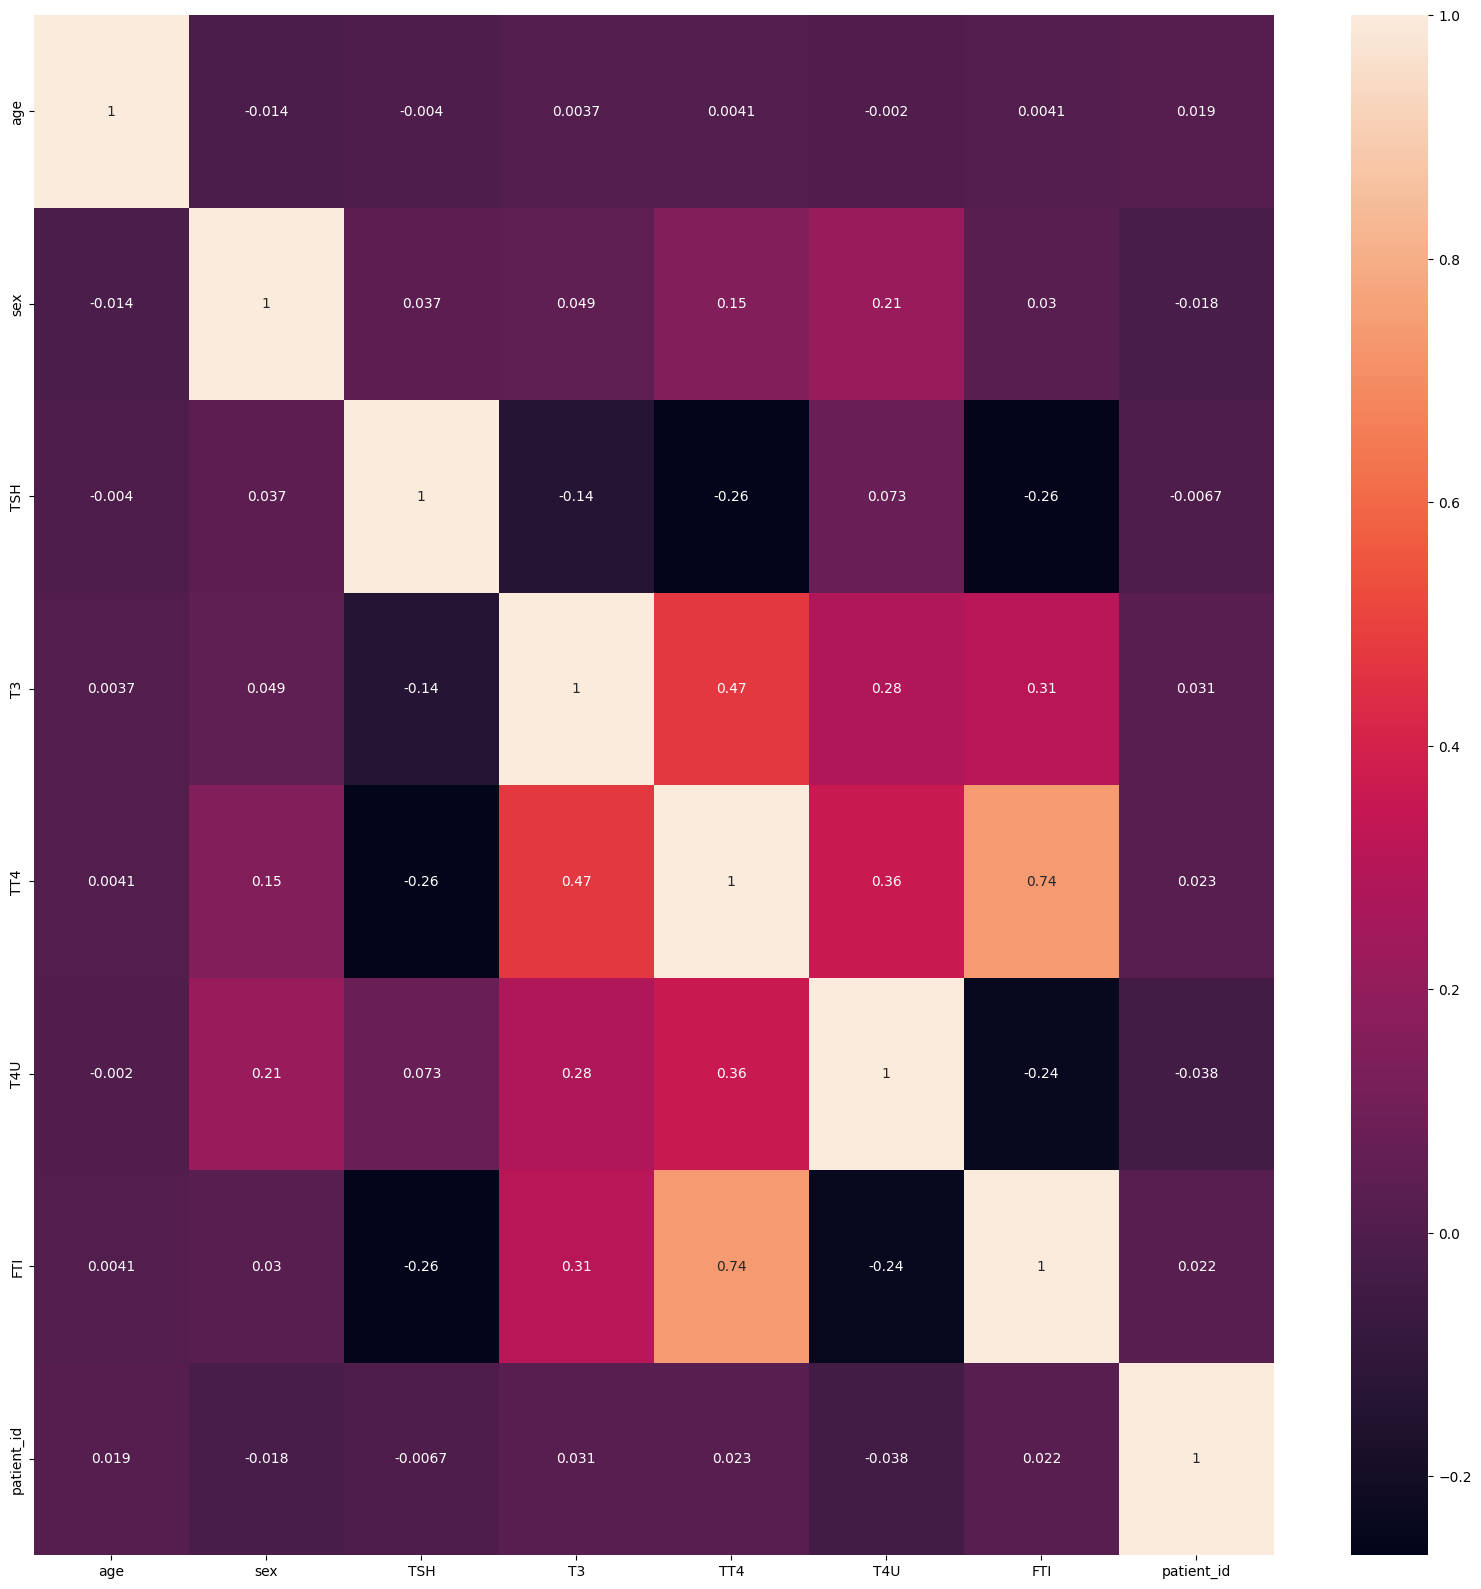

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

In [ ]:
df.corr()

,age,sex,TSH,T3,TT4,T4U,FTI,patient_id
age,1.000000,-0.014178,-0.003978,0.003693,0.004122,-0.002045,0.004108,0.018506
sex,-0.014178,1.000000,0.036707,0.048889,0.150475,0.214717,0.030148,-0.018141
TSH,-0.003978,0.036707,1.000000,-0.136613,-0.264755,0.072962,-0.257900,-0.006718
T3,0.003693,0.048889,-0.136613,1.000000,0.471792,0.281336,0.312401,0.031492
TT4,0.004122,0.150475,-0.264755,0.471792,1.000000,0.362280,0.738279,0.023354
T4U,-0.002045,0.214717,0.072962,0.281336,0.362280,1.000000,-0.238927,-0.037535
FTI,0.004108,0.030148,-0.257900,0.312401,0.738279,-0.238927,1.000000,0.022164
patient_id,0.018506,-0.018141,-0.006718,0.031492,0.023354,-0.037535,0.022164,1.000000


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
cols = df.select_dtypes(include=['object'])

In [ ]:
for i in cols.columns:
    try:
        df[i] = le.fit_transform(df[i])
    except:
        continue


In [ ]:
for a in range(len(df.corr())):
    for b in range(a):
        if((df.corr().iloc[a,b]) >= 0.7):
            print(df.corr().columns[b])


TT4


In [ ]:
df.drop('TT4',axis=1,inplace=True)

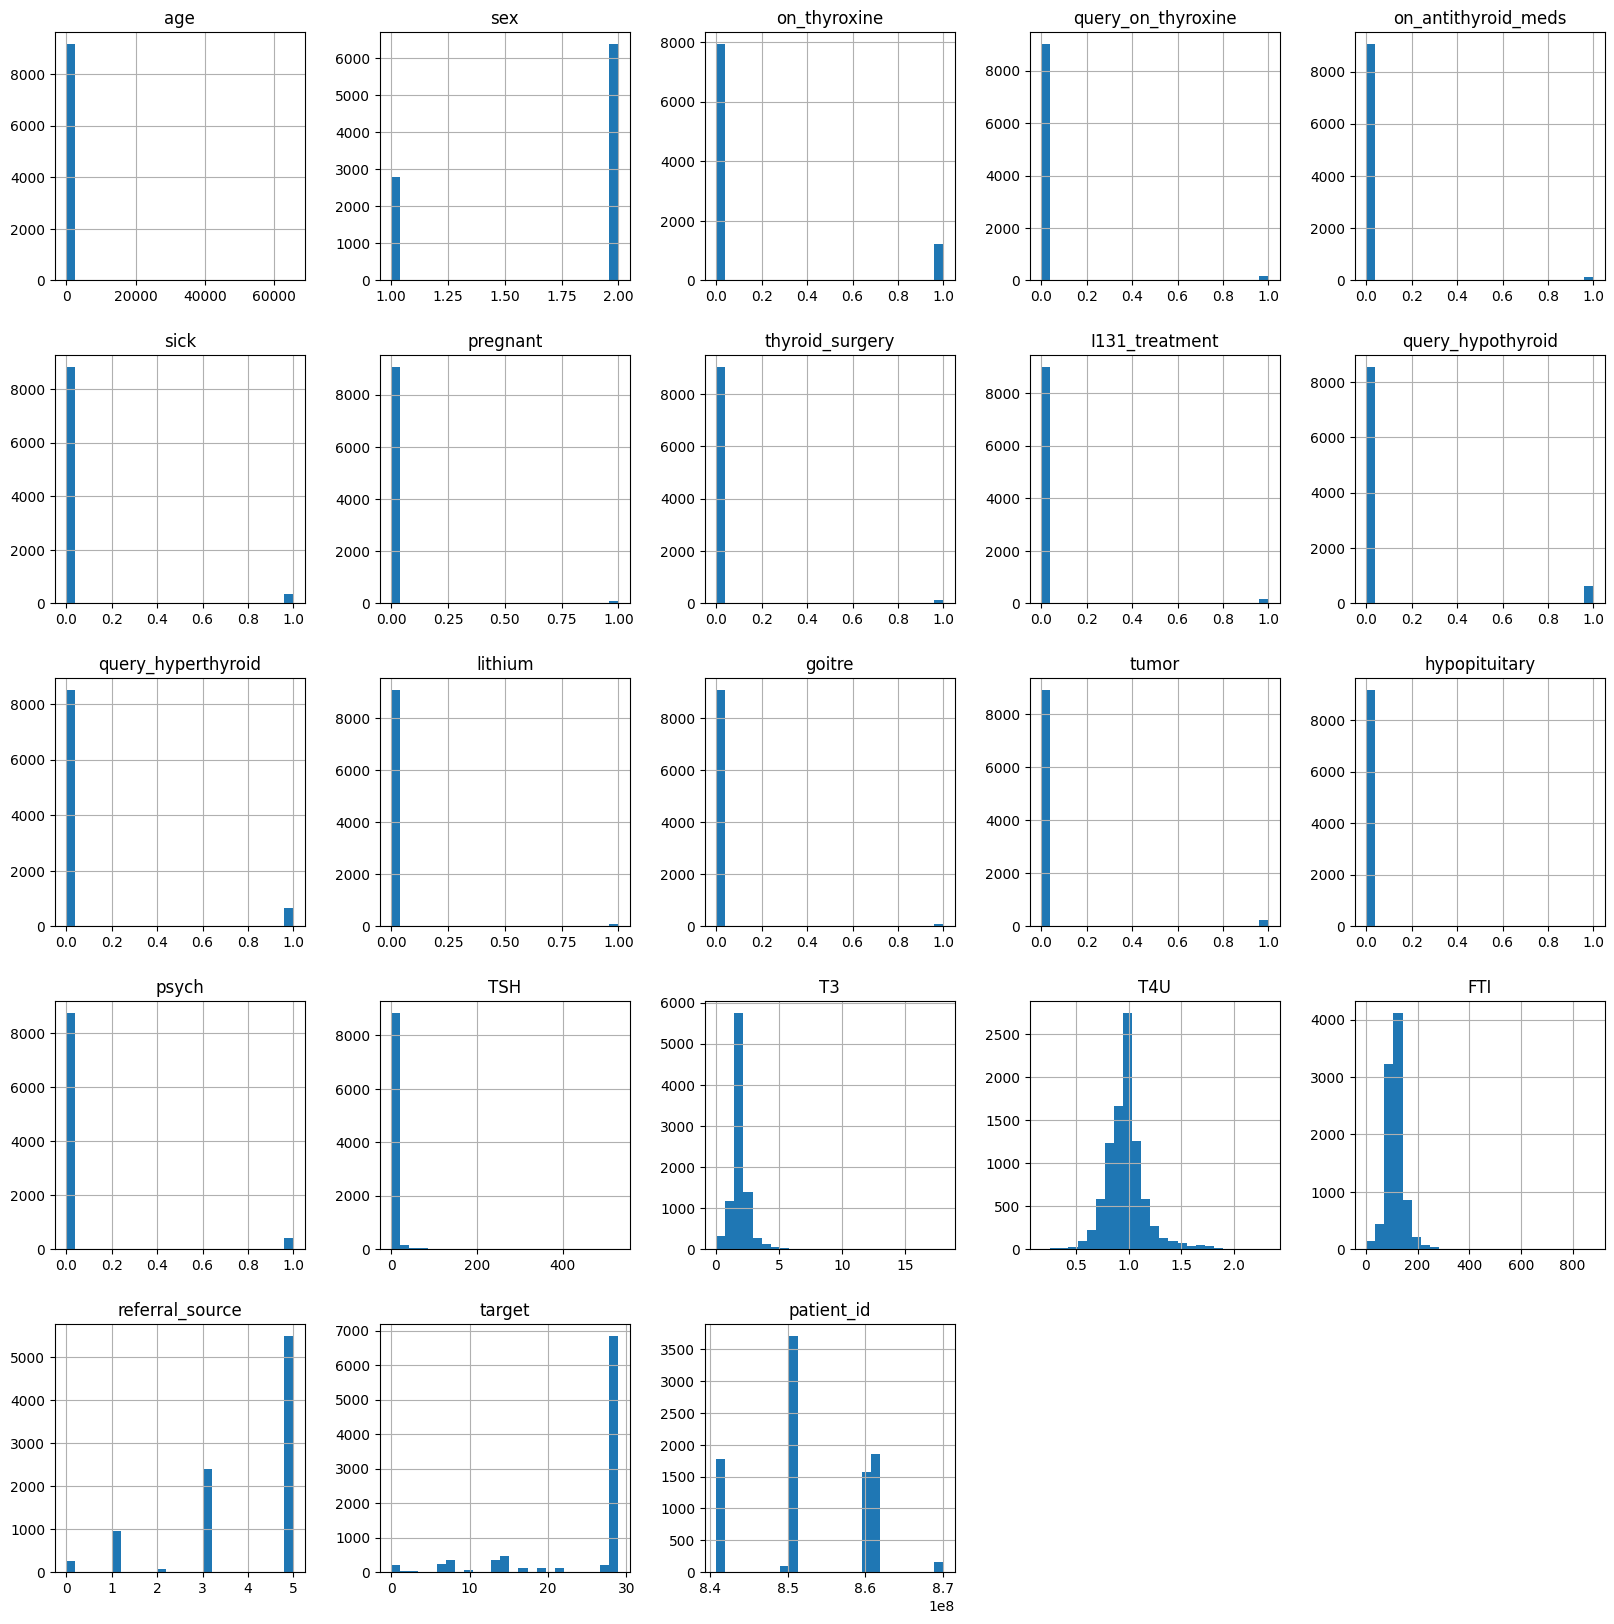

In [ ]:
df.hist(bins=25,figsize=(20,20));

In [ ]:
X = df.drop('target',axis=1)
y = df.target
df2 = X 

In [ ]:
y.unique()

array([29, 28,  6,  1, 27, 13, 19, 22,  8, 15,  0, 16, 17, 21, 26, 14,  3,
       23, 18, 12,  4, 10, 20, 25,  7,  2,  9, 11, 24,  5])

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)

In [ ]:
v = pca.fit_transform(X)

In [ ]:
X_pca = pd.DataFrame(data = v, columns = ['component_1', 'component_2', 'component_3', 'component_4', 'component_5', 'component_6', 'component_7','component_8','component_9','component_10'])

In [ ]:
X_pca

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10
0,-1.214633e+07,-9.454399,2.468719,-4.748913,-1.097560,0.012287,-0.266622,-0.061928,0.414211,0.835245
1,-1.214633e+07,-9.454499,2.194759,-3.478534,-1.079480,-0.039700,-0.213144,-0.220836,-0.129249,0.012566
2,-1.214630e+07,2.545152,1.431917,0.059278,-1.082378,0.094690,-0.232747,-0.322359,0.698658,-0.519702
3,-1.214430e+07,-2.460643,1.431935,0.058945,-1.065406,0.037189,-0.205197,-0.220305,-0.132884,0.014845
4,-1.214430e+07,-6.460645,1.432483,0.058756,-1.065476,0.037193,-0.205171,-0.220315,-0.132873,0.014836
...,...,...,...,...,...,...,...,...,...,...
9167,1.717168e+07,-67.183880,-37.832040,-7.800883,0.760207,0.169700,0.620459,-0.066421,0.794172,-0.542911
9168,1.717168e+07,-101.181155,-16.321784,-3.169405,0.835236,0.002639,0.640887,0.012622,-0.036163,-0.003580
9169,1.717168e+07,-54.182403,-26.104141,-5.273229,0.811264,0.094784,0.605033,0.048483,-0.033948,-0.015429
9170,1.717168e+07,-76.182503,-27.074623,-5.475111,-1.230923,0.095114,-0.232755,-0.179577,-0.136073,0.007877


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
for i in X_pca.columns:
    X_pca[i] = scaler.fit_transform(X_pca[[i]])

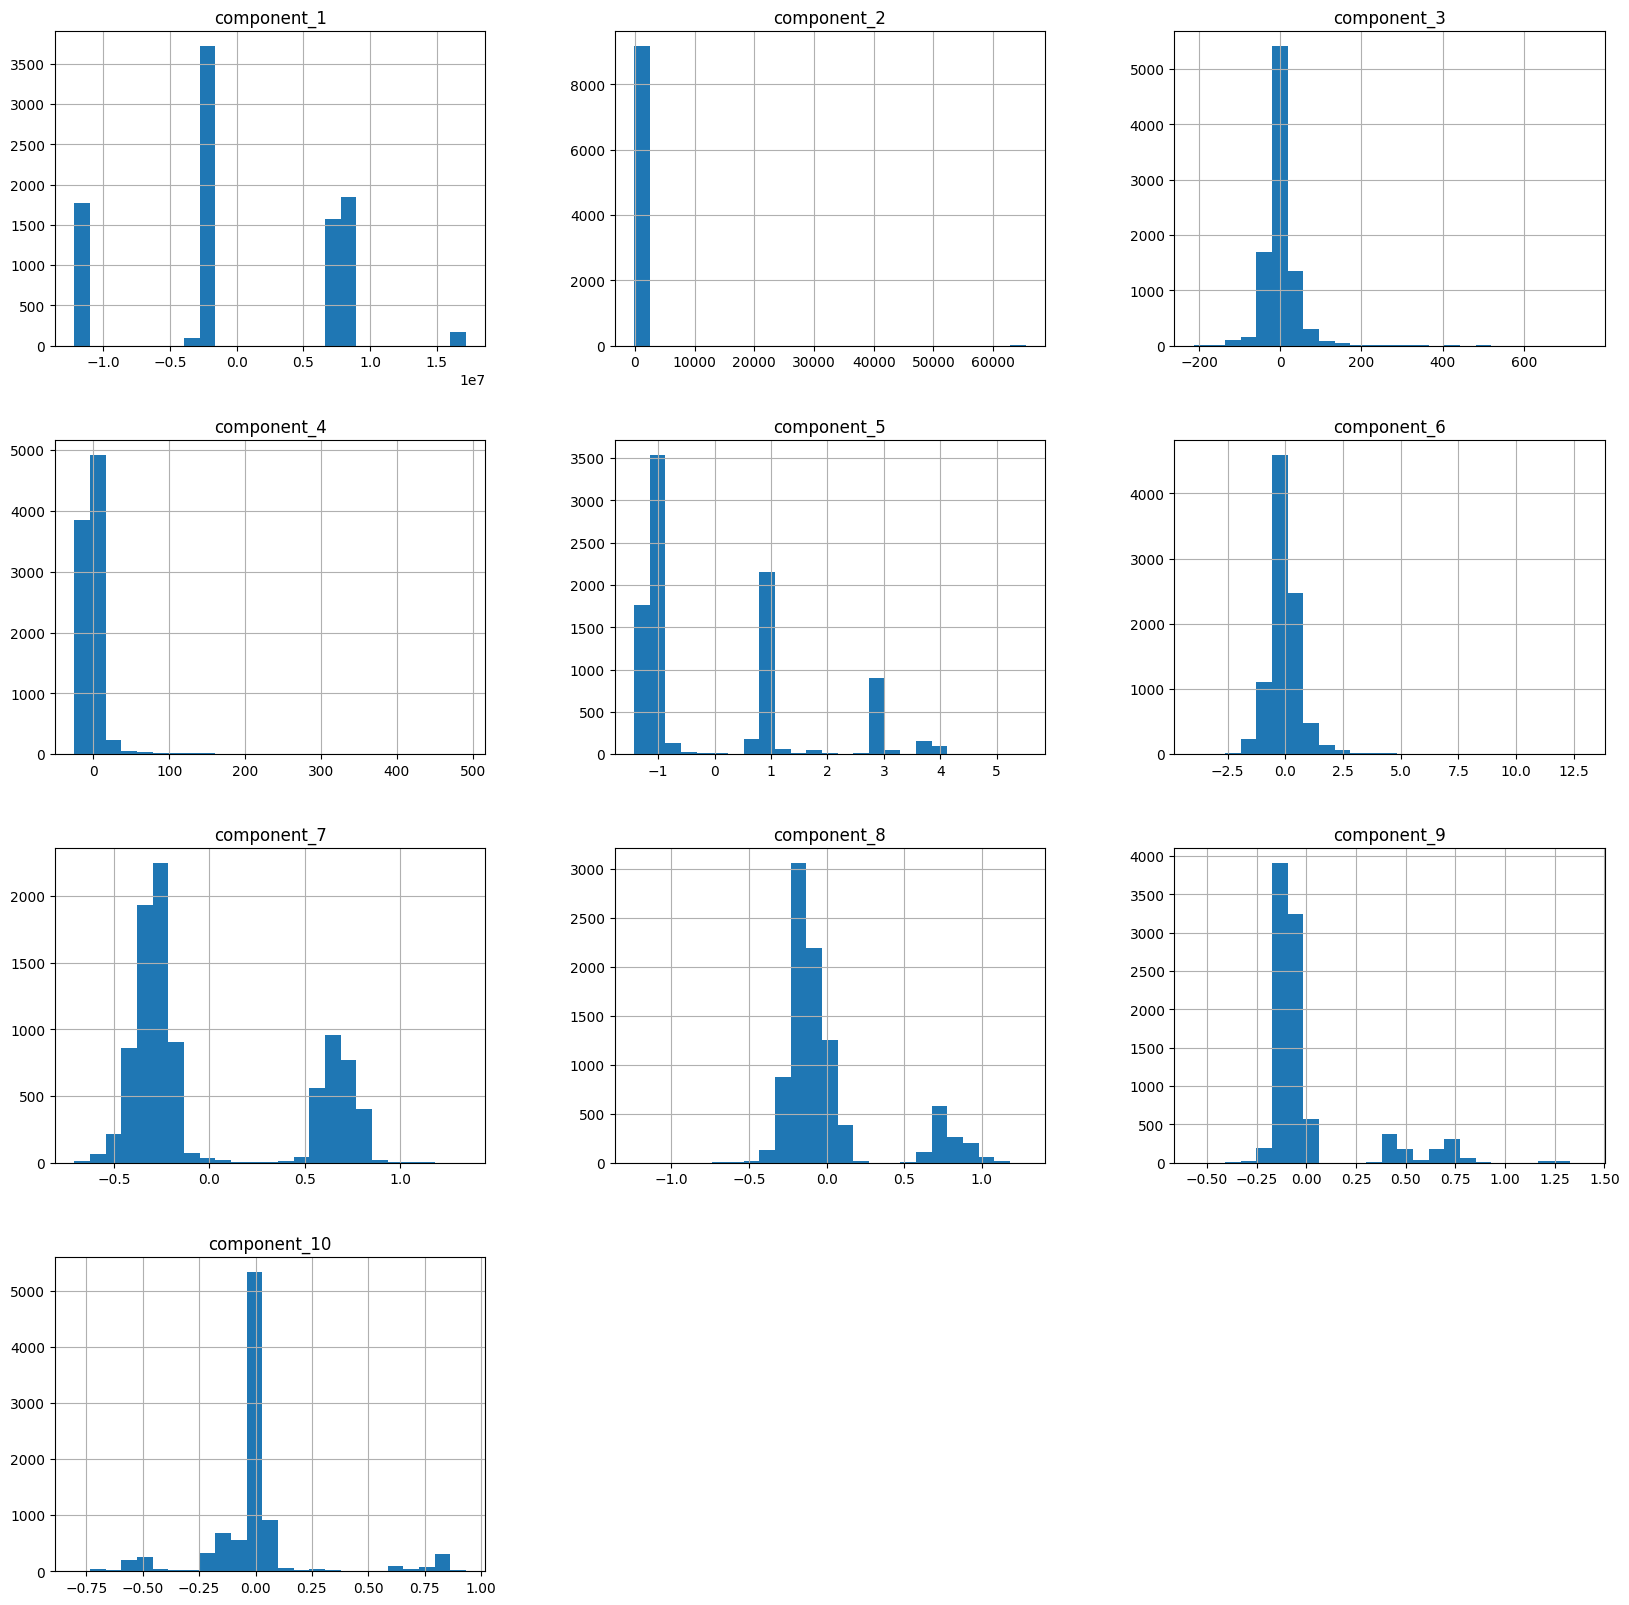

In [ ]:
X_pca.hist(bins=25,figsize=(20,20));

In [ ]:
X_pca

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10
0,-1.214633e+07,-9.454399,2.468719,-4.748913,-1.097560,0.012287,-0.266622,-0.061928,0.414211,0.835245
1,-1.214633e+07,-9.454499,2.194759,-3.478534,-1.079480,-0.039700,-0.213144,-0.220836,-0.129249,0.012566
2,-1.214630e+07,2.545152,1.431917,0.059278,-1.082378,0.094690,-0.232747,-0.322359,0.698658,-0.519702
3,-1.214430e+07,-2.460643,1.431935,0.058945,-1.065406,0.037189,-0.205197,-0.220305,-0.132884,0.014845
4,-1.214430e+07,-6.460645,1.432483,0.058756,-1.065476,0.037193,-0.205171,-0.220315,-0.132873,0.014836
...,...,...,...,...,...,...,...,...,...,...
9167,1.717168e+07,-67.183880,-37.832040,-7.800883,0.760207,0.169700,0.620459,-0.066421,0.794172,-0.542911
9168,1.717168e+07,-101.181155,-16.321784,-3.169405,0.835236,0.002639,0.640887,0.012622,-0.036163,-0.003580
9169,1.717168e+07,-54.182403,-26.104141,-5.273229,0.811264,0.094784,0.605033,0.048483,-0.033948,-0.015429
9170,1.717168e+07,-76.182503,-27.074623,-5.475111,-1.230923,0.095114,-0.232755,-0.179577,-0.136073,0.007877


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_pca,y,test_size=0.33,random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=3)
clf = tree.fit(X_train,y_train)
treepredict = clf.predict(X_test)

In [ ]:
accuracy_score(treepredict,y_test)

0.7978196233894945

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=2,n_estimators=200)
rclf = rf.fit(X_train,y_train)
rfpred = rclf.predict(X_test)
accuracy_score(rfpred,y_test)

0.7327386851668318

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
knnclf = neigh.fit(X_train,y_train)
y_pred = knnclf.predict(X_test)

In [ ]:
accuracy_score(y_pred,y_test)

0.6881400726792204

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel="sigmoid")
sclf = svm.fit(X_train,y_train)
y_pred = sclf.predict(X_test)
accuracy_score(y_pred,y_test)

0.7330690452593327

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
lrclf = lr.fit(X_train,y_train)
y_pred = lrclf.predict(X_test)
accuracy_score(y_pred,y_test)

0.05252725470763132

In [ ]:
df2

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,T4U,FTI,referral_source,patient_id
0,29,2.0,0,0,0,0,0,0,0,1,...,0,0,0,0,0.300000,1.970629,0.976056,113.640746,5,840801013
1,29,2.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1.600000,1.900000,0.976056,113.640746,5,840801014
2,41,2.0,0,0,0,0,0,0,0,0,...,0,0,0,0,5.218403,1.970629,0.976056,113.640746,5,840801042
3,36,2.0,0,0,0,0,0,0,0,0,...,0,0,0,0,5.218403,1.970629,0.976056,113.640746,5,840803046
4,32,2.0,0,0,0,0,0,0,0,0,...,0,0,0,0,5.218403,1.970629,0.976056,113.640746,5,840803047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9167,56,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,5.218403,1.970629,0.830000,77.000000,3,870119022
9168,22,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,5.218403,1.970629,0.920000,99.000000,3,870119023
9169,69,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,5.218403,1.970629,1.270000,89.000000,3,870119025
9170,47,2.0,0,0,0,0,0,0,0,0,...,0,0,0,0,5.218403,1.970629,0.850000,88.000000,5,870119027


<Axes: >

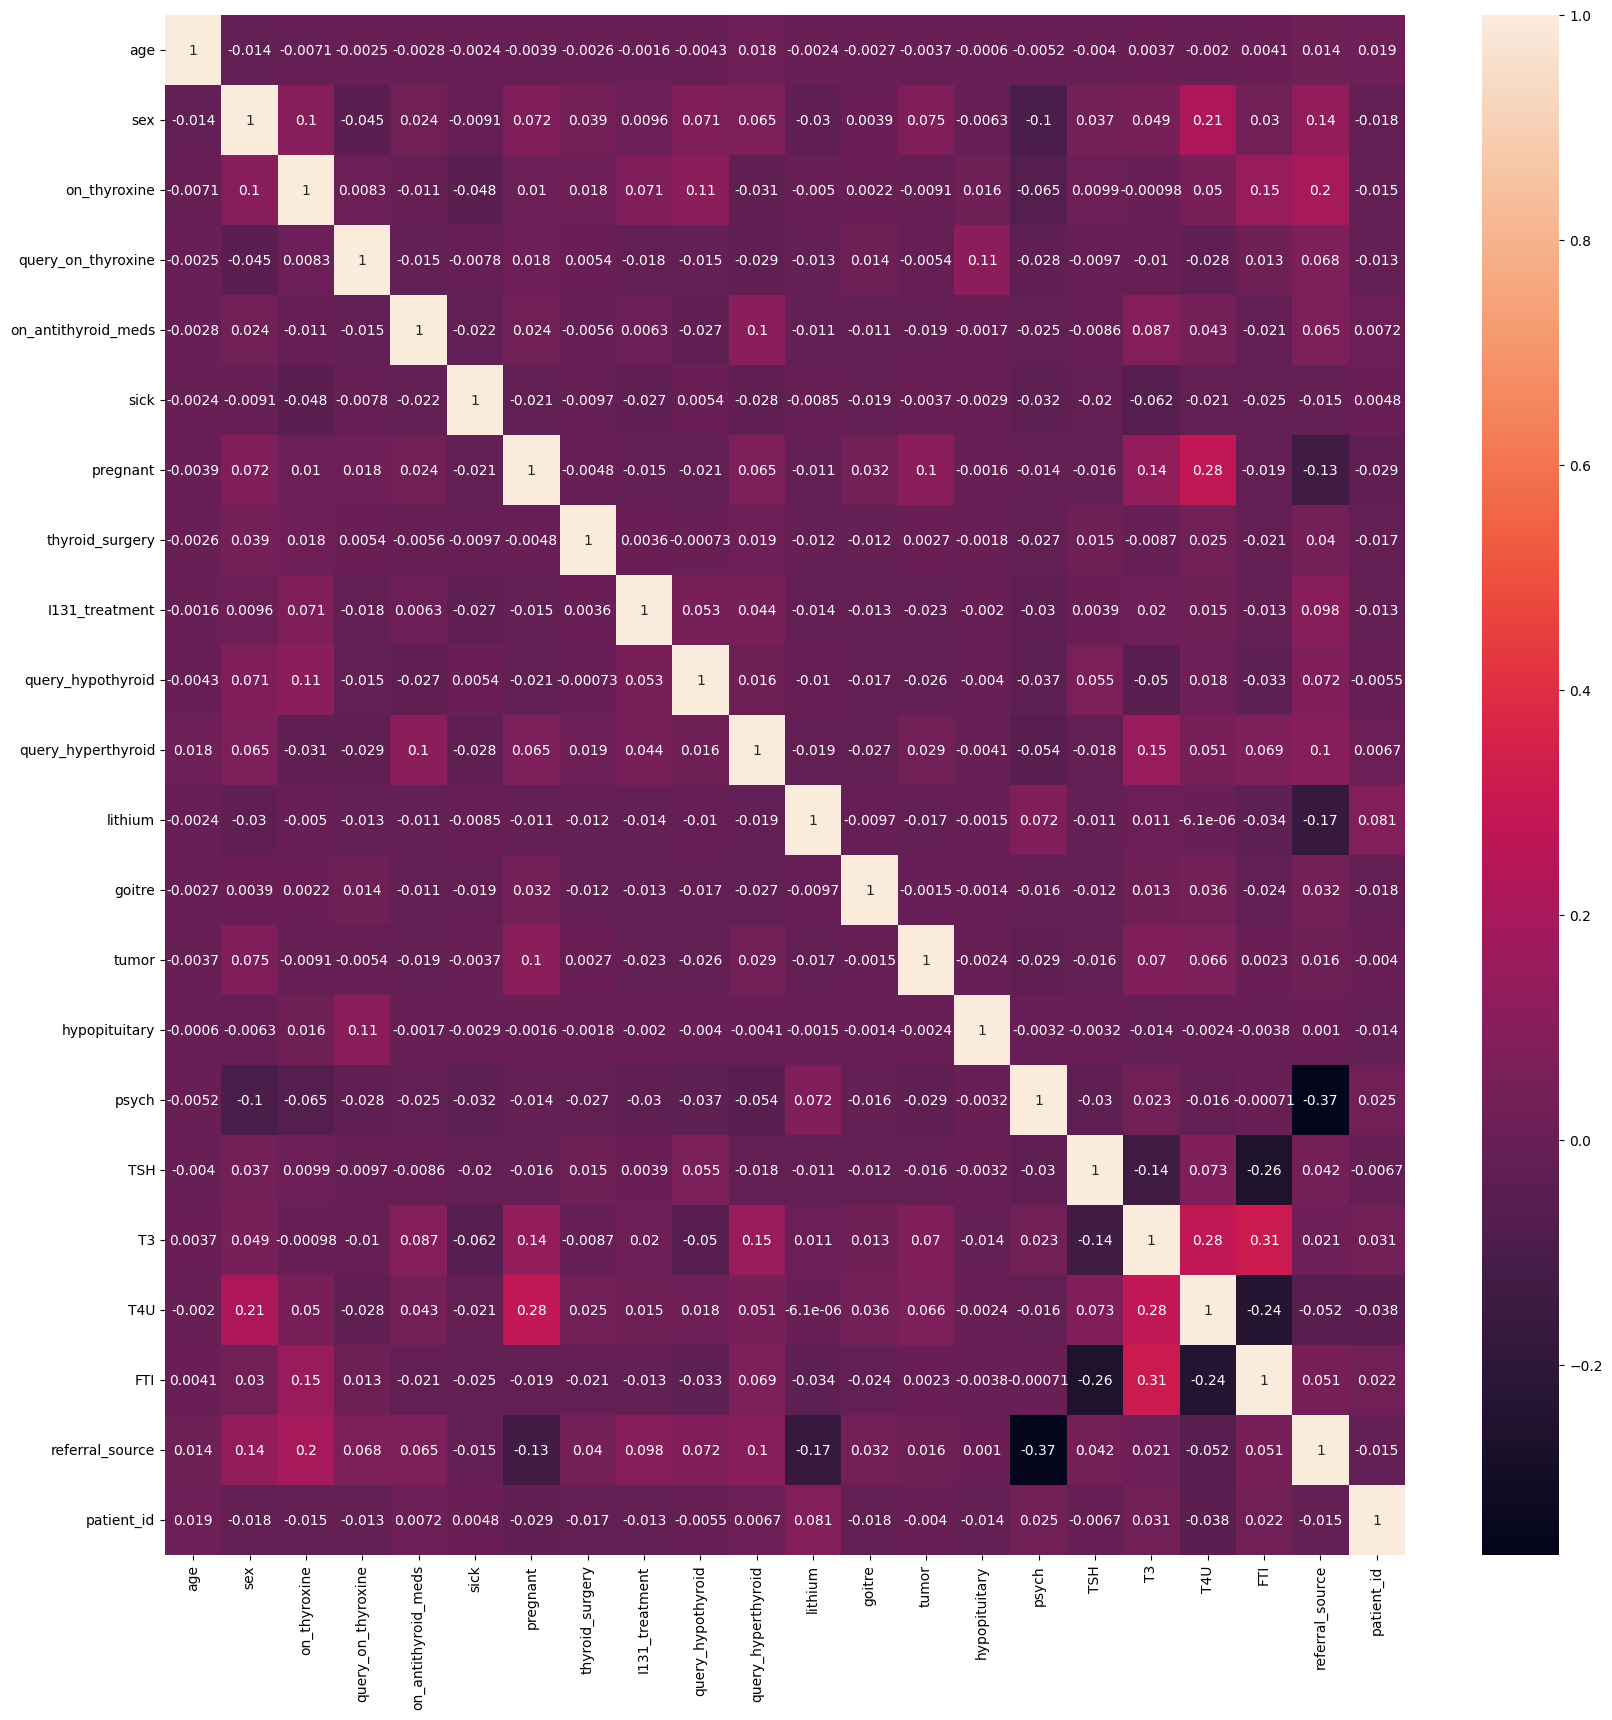

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df2.corr(),annot=True)

In [ ]:
for i in df2.columns:
    print("\n\n")
    print(i)
    print(df2[i].unique())




age
[   29    41    36    32    60    77    28    54    42    51    37    16
    43    63    40    75    56    85    71    67    55    61    46    44
    82    64    70    33    59    53    52    49    35    48    27    69
    76    73    68    66    30    88    38    58    21    45    83    62
    25    86    72    14    15    39    26    20    80    90    23    18
    13    78    24    81    92    57    74     9    47    17    11    50
    34     8    79    31    65    84    12    10    19    22     1     2
    97     6    89    87   455    93     7    91     5    94     4 65511
    95 65512     3 65526]



sex
[2. 1.]



on_thyroxine
[0 1]



query_on_thyroxine
[0 1]



on_antithyroid_meds
[0 1]



sick
[0 1]



pregnant
[0 1]



thyroid_surgery
[0 1]



I131_treatment
[0 1]



query_hypothyroid
[1 0]



query_hyperthyroid
[0 1]



lithium
[0 1]



goitre
[0 1]



tumor
[0 1]



hypopituitary
[0 1]



psych
[0 1]



TSH
[3.00000000e-01 1.60000000e+00 5.21840275e+00 7.00000000e-01

In [ ]:
cols = ['age','sex','TSH','T3','T4U','FTI']
for i in cols:
    df2[i] = scaler.fit_transform(df2[[i]])

In [ ]:
X = df2
y = df['target']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=3)
clf = tree.fit(X_train,y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_pred,y_test)

0.8460521968946151

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=2,n_estimators=200)
rclf = rf.fit(X_train,y_train)
y_pred = rclf.predict(X_test)
accuracy_score(y_pred,y_test)

0.7330690452593327

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
knnclf = neigh.fit(X_train,y_train)
y_pred = knnclf.predict(X_test)
accuracy_score(y_pred,y_test)

0.6362735381565907

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel="sigmoid")
sclf = svm.fit(X_train,y_train)
y_pred = sclf.predict(X_test)
accuracy_score(y_pred,y_test)

0.7330690452593327

In [ ]:
pickle.dump(DecisionTreeClassifier,open('rfd.pkl','wb'))